In [ ]:
# Load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("echallan_daily_data.csv")
df.head()


,date,totalChallan,disposedChallan,pendingChallan,pendingAmount,disposedAmount,totalAmount,pendingCourt,disposedCourt,totalCourt
0,2015-01-01,120,29,91,588600,116860,705460,1,0,1
1,2015-01-02,162,39,123,663350,281425,944775,1,1,2
2,2015-01-03,122,34,88,596900,286950,883850,4,1,5
3,2015-01-04,116,27,89,967350,301600,1268950,3,2,5
4,2015-01-05,162,28,134,877654,103000,980654,2,0,2


In [ ]:
# Data analysis operation
print("Shape:", df.shape)
df.info()

Shape: (4061, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4061 entries, 0 to 4060
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             4061 non-null   object
 1   totalChallan     4061 non-null   int64 
 2   disposedChallan  4061 non-null   int64 
 3   pendingChallan   4061 non-null   int64 
 4   pendingAmount    4061 non-null   int64 
 5   disposedAmount   4061 non-null   int64 
 6   totalAmount      4061 non-null   int64 
 7   pendingCourt     4061 non-null   int64 
 8   disposedCourt    4061 non-null   int64 
 9   totalCourt       4061 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 317.4+ KB


In [ ]:
# Data analysis operation for detecting outliers
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

print("Outliers treated using IQR method")

Outliers treated using IQR method


In [ ]:
# Perform data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df_scaled.head()

,date,totalChallan,disposedChallan,pendingChallan,pendingAmount,disposedAmount,totalAmount,pendingCourt,disposedCourt,totalCourt
0,2015-01-01,-1.086796,-1.273024,-0.918470,-0.785479,-1.191840,-0.926449,-0.915781,-1.140429,-0.986846
1,2015-01-02,-1.086350,-1.272699,-0.918005,-0.784877,-1.188292,-0.925019,-0.915781,-1.140224,-0.986819
2,2015-01-03,-1.086774,-1.272862,-0.918514,-0.785412,-1.188173,-0.925383,-0.915694,-1.140224,-0.986739
3,2015-01-04,-1.086838,-1.273089,-0.918500,-0.782426,-1.187857,-0.923083,-0.915723,-1.140019,-0.986739
4,2015-01-05,-1.086350,-1.273057,-0.917845,-0.783149,-1.192139,-0.924805,-0.915752,-1.140429,-0.986819


In [ ]:
# Data analysis operation
df.describe()


,totalChallan,disposedChallan,pendingChallan,pendingAmount,disposedAmount,totalAmount,pendingCourt,disposedCourt,totalCourt
count,4061.000000,4061.000000,4061.000000,4.061000e+03,4.061000e+03,4.061000e+03,4061.000000,4061.000000,4061.000000
mean,102564.295986,39190.895100,63373.400886,9.998178e+07,5.655994e+07,1.565417e+08,31538.348190,5563.763113,37102.111303
std,94274.309905,30766.668065,69079.820831,1.295082e+08,6.258393e+07,1.719233e+08,34442.072462,4879.257000,37600.288253
min,10.000000,6.000000,3.000000,2.040000e+04,6.700000e+03,5.440000e+04,0.000000,0.000000,0.000000
25%,1864.000000,1032.000000,1131.000000,1.765850e+06,5.127580e+06,7.183220e+06,843.000000,119.000000,945.000000
50%,104931.000000,47012.000000,53038.000000,5.541961e+07,5.496822e+07,1.055297e+08,23338.000000,6332.000000,31606.000000
75%,174420.000000,67133.000000,102064.000000,1.658786e+08,9.343013e+07,2.700863e+08,54761.000000,9851.000000,65373.000000
max,332710.000000,96645.000000,280588.000000,5.659961e+08,2.071116e+09,2.147021e+09,136032.000000,15910.000000,146748.000000


In [ ]:
# Data analysis operation for mean
df.mean(numeric_only=True)

,0
totalChallan,1.025643e+05
disposedChallan,3.919090e+04
pendingChallan,6.337340e+04
pendingAmount,9.998178e+07
disposedAmount,5.655994e+07
totalAmount,1.565417e+08
pendingCourt,3.153835e+04
disposedCourt,5.563763e+03
totalCourt,3.710211e+04


In [ ]:
# Data analysis operation for median
df.median(numeric_only=True)

,0
totalChallan,104931.0
disposedChallan,47012.0
pendingChallan,53038.0
pendingAmount,55419609.0
disposedAmount,54968223.0
totalAmount,105529652.0
pendingCourt,23338.0
disposedCourt,6332.0
totalCourt,31606.0


In [ ]:
# Data analysis operation for mode
df.mode().iloc[0]

,0
date,2015-01-01
totalChallan,73.0
disposedChallan,29.0
pendingChallan,88.0
pendingAmount,311000.0
disposedAmount,92700.0
totalAmount,510600.0
pendingCourt,0.0
disposedCourt,0.0
totalCourt,2.0


In [ ]:
# Data analysis for standardization
df.std(numeric_only=True)

,0
totalChallan,9.427431e+04
disposedChallan,3.076667e+04
pendingChallan,6.907982e+04
pendingAmount,1.295082e+08
disposedAmount,6.258393e+07
totalAmount,1.719233e+08
pendingCourt,3.444207e+04
disposedCourt,4.879257e+03
totalCourt,3.760029e+04


In [ ]:
# Data analysis operation for variance
df.var(numeric_only=True)

,0
totalChallan,8.887646e+09
disposedChallan,9.465879e+08
pendingChallan,4.772022e+09
pendingAmount,1.677238e+16
disposedAmount,3.916748e+15
totalAmount,2.955762e+16
pendingCourt,1.186256e+09
disposedCourt,2.380715e+07
totalCourt,1.413782e+09


In [ ]:
# Data analysis for normalization
df.max(numeric_only=True) - df.min(numeric_only=True)

,0
totalChallan,332700
disposedChallan,96639
pendingChallan,280585
pendingAmount,565975693
disposedAmount,2071108952
totalAmount,2146966653
pendingCourt,136032
disposedCourt,15910
totalCourt,146748


In [ ]:
# Data analysis for covariance matrix
IQR_values = df[numeric_cols].quantile(0.75) - df[numeric_cols].quantile(0.25)
print("IQR Values:\n", IQR_values)

cov_matrix = df[numeric_cols].cov()
print("Covariance Matrix:\n", cov_matrix)

IQR Values:
 totalChallan          172556.0
disposedChallan        66101.0
pendingChallan        100933.0
pendingAmount      164112767.0
disposedAmount      88302548.0
totalAmount        262903116.0
pendingCourt           53918.0
disposedCourt           9732.0
totalCourt             64428.0
dtype: float64
Covariance Matrix:
                  totalChallan  disposedChallan  pendingChallan  pendingAmount  \
totalChallan     8.887646e+09     2.531106e+09    6.335621e+09   1.091347e+13   
disposedChallan  2.531106e+09     9.465879e+08    1.583445e+09   2.549278e+12   
pendingChallan   6.335621e+09     1.583445e+09    4.734091e+09   8.334330e+12   
pendingAmount    1.091347e+13     2.549278e+12    8.334330e+12   1.539436e+16   
disposedAmount   3.891947e+12     1.338562e+12    2.550262e+12   4.350604e+15   
totalAmount      1.519738e+13     3.917971e+12    1.123560e+13   2.036432e+16   
pendingCourt     3.002911e+09     8.383689e+08    2.161687e+09   3.801066e+12   
disposedCourt    3.025787

In [ ]:
# Data analysis for skewness
df.skew(numeric_only=True)

,0
totalChallan,0.446483
disposedChallan,-0.133945
pendingChallan,0.987948
pendingAmount,1.448071
disposedAmount,11.503952
totalAmount,1.442754
pendingCourt,0.967327
disposedCourt,0.124632
totalCourt,0.727263


In [ ]:
# Data analysis for kurtosis
df.kurtosis(numeric_only=True)

,0
totalChallan,-1.038060
disposedChallan,-1.597062
pendingChallan,-0.016980
pendingAmount,1.195805
disposedAmount,314.066735
totalAmount,5.067688
pendingCourt,-0.097743
disposedCourt,-1.502060
totalCourt,-0.591145


In [ ]:
# Data analysis operation
df.isnull().sum()

,0
date,0
totalChallan,0
disposedChallan,0
pendingChallan,0
pendingAmount,0
disposedAmount,0
totalAmount,0
pendingCourt,0
disposedCourt,0
totalCourt,0


In [ ]:
# Handle missing values
df_filled = df.copy()
df_filled.fillna(df.mean(numeric_only=True), inplace=True)

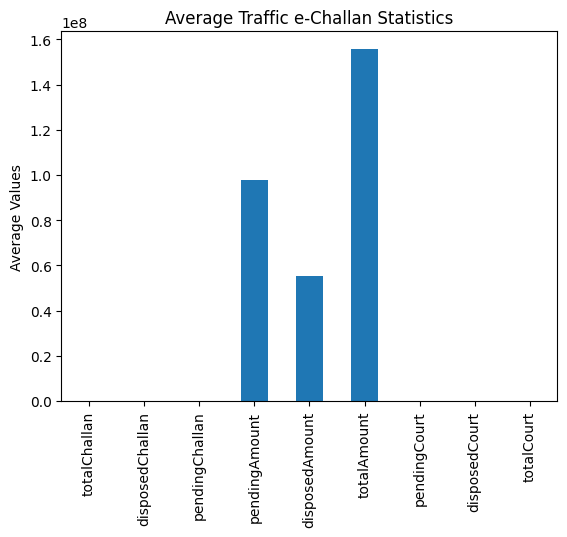

In [ ]:
# create bar chart
df[numeric_cols].mean().plot(kind="bar")
plt.title("Average Traffic e-Challan Statistics")
plt.ylabel("Average Values")
plt.show()

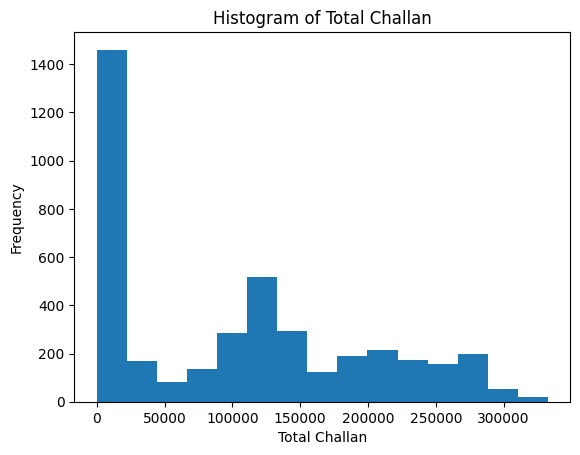

In [ ]:
# Create histogram visualization
plt.hist(df["totalChallan"], bins=15)
plt.xlabel("Total Challan")
plt.ylabel("Frequency")
plt.title("Histogram of Total Challan")
plt.show()

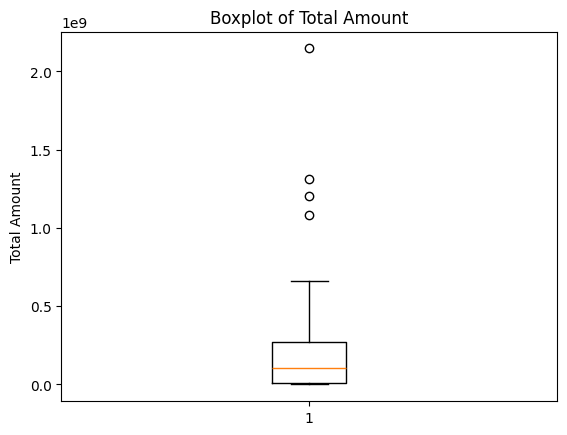

In [ ]:
# Create boxplot visualization
plt.boxplot(df["totalAmount"].dropna())
plt.ylabel("Total Amount")
plt.title("Boxplot of Total Amount")
plt.show()


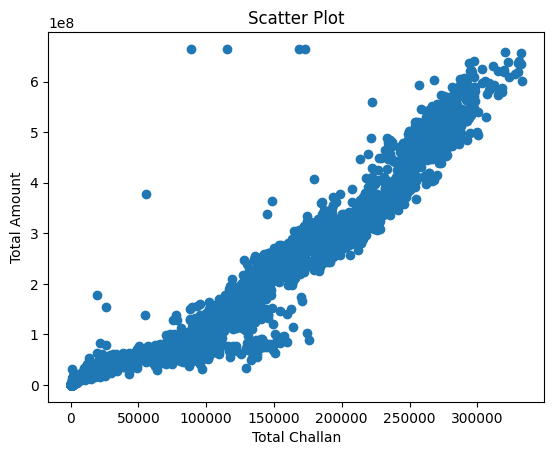

In [ ]:
# create scatter plot
plt.scatter(df["totalChallan"], df["totalAmount"])
plt.xlabel("Total Challan")
plt.ylabel("Total Amount")
plt.title("Scatter Plot")
plt.show()

In [ ]:
# Group data for analysis
df.groupby("date").mean(numeric_only=True)


,totalChallan,disposedChallan,pendingChallan,pendingAmount,disposedAmount,totalAmount,pendingCourt,disposedCourt,totalCourt
date,,,,,,,,,
2015-01-01,120.0,29.0,91.0,588600.0,116860.0,705460.0,1.0,0.0,1.0
2015-01-02,162.0,39.0,123.0,663350.0,281425.0,944775.0,1.0,1.0,2.0
2015-01-03,122.0,34.0,88.0,596900.0,286950.0,883850.0,4.0,1.0,5.0
2015-01-04,116.0,27.0,89.0,967350.0,301600.0,1268950.0,3.0,2.0,5.0
2015-01-05,162.0,28.0,134.0,877654.0,103000.0,980654.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
2026-02-09,242251.0,33045.0,209206.0,399248914.0,72117659.0,471366573.0,13240.0,107.0,13347.0
2026-02-10,235459.0,30908.0,204551.0,409291982.0,75390316.0,484682298.0,13867.0,86.0,13953.0
2026-02-11,234315.0,31543.0,202772.0,405939091.0,73253910.0,479193001.0,13760.0,44.0,13804.0


In [ ]:
# Correlation analysis
df_filled.corr(numeric_only=True)

,totalChallan,disposedChallan,pendingChallan,pendingAmount,disposedAmount,totalAmount,pendingCourt,disposedCourt,totalCourt
totalChallan,1.000000,0.872643,0.976059,0.924891,0.664607,0.938644,0.924831,0.657796,0.932510
disposedChallan,0.872643,1.000000,0.745531,0.645220,0.707092,0.743436,0.791166,0.903362,0.841938
pendingChallan,0.976059,0.745531,1.000000,0.974846,0.592075,0.949871,0.909763,0.495367,0.897630
pendingAmount,0.924891,0.645220,0.974846,1.000000,0.547091,0.952444,0.865478,0.358851,0.839349
disposedAmount,0.664607,0.707092,0.592075,0.547091,1.000000,0.776141,0.628122,0.621623,0.656029
totalAmount,0.938644,0.743436,0.949871,0.952444,0.776141,1.000000,0.880607,0.496604,0.871083
pendingCourt,0.924831,0.791166,0.909763,0.865478,0.628122,0.880607,1.000000,0.606117,0.994659
disposedCourt,0.657796,0.903362,0.495367,0.358851,0.621623,0.496604,0.606117,1.000000,0.684973
totalCourt,0.932510,0.841938,0.897630,0.839349,0.656029,0.871083,0.994659,0.684973,1.000000


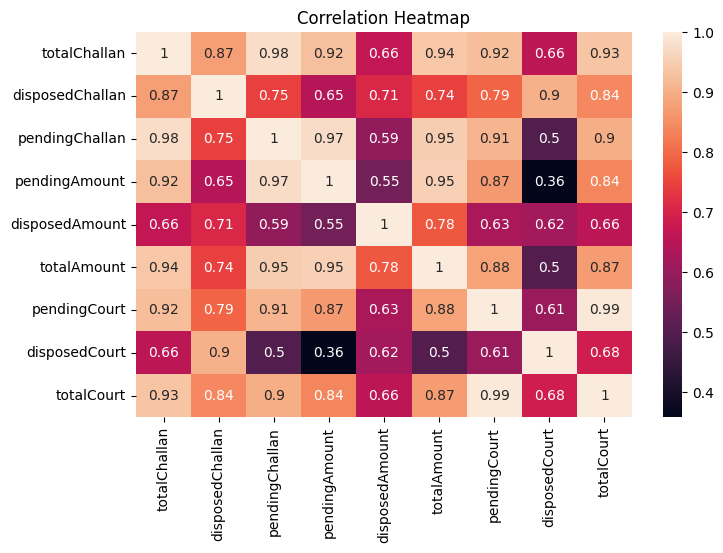

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df_filled.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

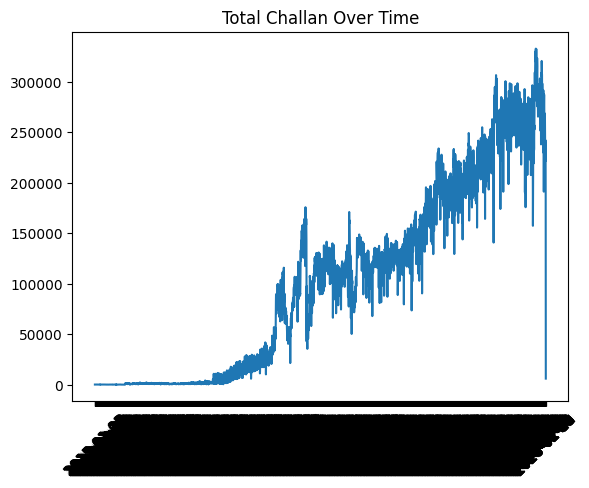

In [ ]:
# create line graph
df_sorted = df.sort_values("date")

plt.plot(df_sorted["date"], df_sorted["totalChallan"])
plt.xticks(rotation=45)
plt.title("Total Challan Over Time")
plt.show()